In [ ]:
import pandas as pd
from fastai.vision.all import *
from sklearn.model_selection import train_test_split
import os
from glob import glob
from sklearn import metrics

CheXpert Race v1 Validation

In [ ]:
lst = os.listdir('/content/India_TB')
test_df = pd.DataFrame(lst, columns = ['Path'])
test_df = 'India_TB/' + test_df['Path']
test_df = test_df.to_frame()
chexpert_race1_model = load_learner('/content/chexpert_race1.pkl')
chexpert_race1_model.dls.to(device='cuda')
chexpert_race1_model.model.to(device='cuda')
race_test_dl = chexpert_race1_model.dls.test_dl(test_df)
race_preds = chexpert_race1_model.get_preds(dl=race_test_dl, with_decoded=True)
chexpert_race1_model.dls.vocab

['Non-Hispanic Asian', 'Non-Hispanic Black', 'Non-Hispanic White']

[0.40540541 0.38288288 0.21171171]


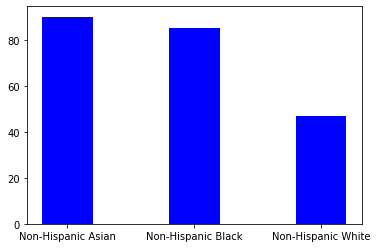

In [ ]:
race_labels = chexpert_race1_model.dls.vocab.o2i.keys()
prediction_counts = [race_preds[2].tolist().count(0), race_preds[2].tolist().count(1), race_preds[2].tolist().count(2)]
plt.bar(race_labels, prediction_counts, color ='blue', width = 0.4)
print(np.array(prediction_counts)/len(test_df))

In [ ]:
test_df.insert(len(test_df.columns), 'Race/Ethnicity_Tensor_Id', race_preds[2].numpy())
test_df.insert(len(test_df.columns), 'Race/Ethnicity_Probability', race_preds[0].numpy().tolist())
print(test_df)
test_df.to_csv('/content/sample_data/chexpert_race_v1_india_test.csv')

                   Path  Race/Ethnicity_Tensor_Id  \
0      India_TB/n12.jpg                         0   
1     India_TB/px43.jpg                         1   
2     India_TB/px36.jpg                         0   
3      India_TB/nx9.jpg                         2   
4       India_TB/n4.jpg                         0   
..                  ...                       ...   
217  India_TB/pd735.jpg                         2   
218  India_TB/pd235.jpg                         0   
219    India_TB/n23.jpg                         1   
220    India_TB/n18.jpg                         0   
221   India_TB/px10.jpg                         0   

                                           Race/Ethnicity_Probability  
0    [0.958615243434906, 0.0030803470872342587, 0.038304418325424194]  
1      [0.019712043926119804, 0.8004139065742493, 0.1798740178346634]  
2     [0.49737903475761414, 0.09350671619176865, 0.40911418199539185]  
3      [0.19971749186515808, 0.3614633083343506, 0.43881919980049133]  
4  